In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc, ndimage

## Read image and flatten to grayscale

In [2]:
image = misc.imread('cat.jpg', flatten=True)#flatten=True => gray-scale
image

array([[144., 144., 145., ..., 228., 228., 228.],
       [141., 142., 142., ..., 227., 227., 227.],
       [140., 140., 139., ..., 227., 227., 227.],
       ...,
       [159., 160., 161., ..., 255., 255., 255.],
       [154., 155., 156., ..., 255., 255., 255.],
       [145., 147., 149., ..., 255., 255., 255.]], dtype=float32)

In [3]:
image.shape

(451, 600)

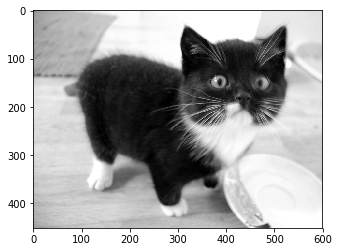

In [4]:
plt.gray()
plt.imshow(image)
plt.show()

## Save image

In [5]:
misc.imsave('cat_saved.png',image)

## Crop image

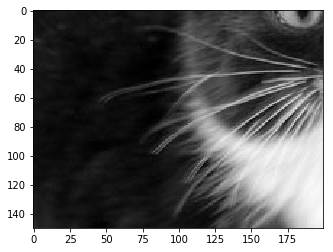

In [6]:
plt.imshow(image[150:300,200:400])
plt.show()

## Resize image

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/scipy/misc/pilutil.py:413: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts,int):
/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/scipy/misc/pilutil.py:415: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size),float):


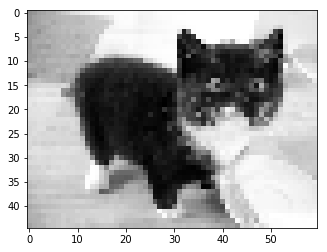

In [7]:
plt.imshow(misc.imresize(image,0.10))
plt.show()

In [8]:
misc.imresize(image,0.10).shape

(45, 60)

## Find the center of mass

In [9]:
ndimage.measurements.center_of_mass(image)

(229.96193520313489, 310.4357730180327)

## Filter image

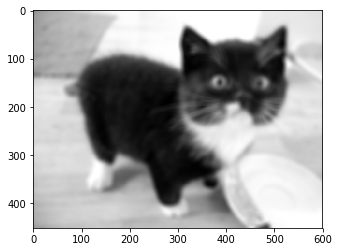

In [10]:
plt.imshow(ndimage.uniform_filter(image, size=11))
plt.show()

## Detect edges

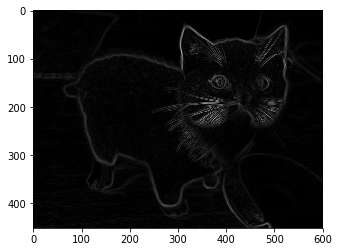

In [11]:
sx = ndimage.sobel(image, axis=0, mode='constant')
sy = ndimage.sobel(image, axis=1, mode='constant')
image_edges = np.hypot(sx, sy)

plt.imshow(image_edges)
plt.show()

## Center image

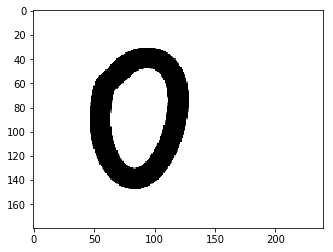

In [12]:
#Show original
image = misc.imread('o.png', flatten=True)
image = misc.imresize(image,0.20)

plt.imshow(image)
plt.show()

In [13]:
#Roll array
xs = np.array([ 0,1,2,3,4,5,6,7,8,9])
np.roll(xs, 2) #np.roll(a, shift, axis=None)

array([8, 9, 0, 1, 2, 3, 4, 5, 6, 7])

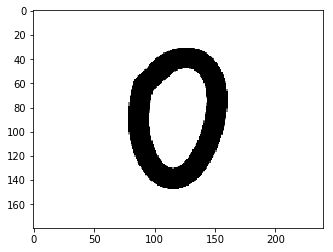

In [14]:
objs = ndimage.find_objects(image - image.max())

x_cm = 0.5*(objs[0][0].stop + objs[0][0].start)
y_cm = 0.5*(objs[0][1].stop + objs[0][1].start)

image = np.roll(image, int(0.5*image.shape[0] - x_cm), axis=0)
image = np.roll(image, int(0.5*image.shape[1] - y_cm), axis=1)

plt.imshow(image)
plt.show()

## Crop object

In [15]:
objs = ndimage.find_objects(image - image.max()) #use of negative image to find the object

In [16]:
image = image[int(objs[0][0].start):int(objs[0][0].stop),int(objs[0][1].start):int(objs[0][1].stop)]

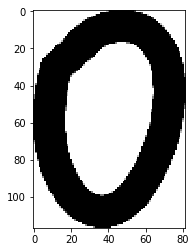

In [17]:
plt.imshow(image)
plt.show()

## Rescale image

In [18]:
image.shape

(117, 82)

In [19]:
h = 91.0/image.shape[0]
l = 61.0/image.shape[1]
image = ndimage.zoom(image,(h,l))[0:90,0:60]

In [20]:
image.shape

(90, 60)

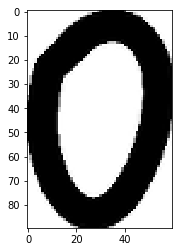

In [21]:
plt.imshow(image)
plt.show()